In [1]:
from google.colab import files
uploaded = files.upload()

Saving carbonemission.csv to carbonemission.csv


In [6]:
import pandas as pd
import io

# Read the uploaded CSV into a DataFrame
df = pd.read_csv(io.BytesIO(uploaded['carbonemission.csv']))

# Melt the DataFrame
df_melted = df.melt(id_vars=['Country code', 'Country name', 'Series code', 'Series name'], var_name='year', value_name='value')

# Convert 'year' column to numeric, coercing errors
df_melted['year'] = pd.to_numeric(df_melted['year'], errors='coerce')

# Convert 'value' column to numeric, coercing errors
df_melted['value'] = pd.to_numeric(df_melted['value'], errors='coerce')

# Drop rows with NaN values in 'year' or 'value' after conversion
df_melted.dropna(subset=['year', 'value'], inplace=True)

# Convert 'year' column to integer
df_melted['year'] = df_melted['year'].astype(int)

In [7]:
df_wide = df_melted.pivot_table(
    index=["Country name", "year"],
    columns="Series name",
    values="value"
).reset_index()

display(df_wide.head())

Series name,Country name,year,Access to electricity (% of total population),Access to improved sanitation (% of total pop.),Access to improved water source (% of total pop.),Agricultural land under irrigation (% of total ag. land),Annual freshwater withdrawals (% of internal resources),"Average annual precipitation (1961-1990, mm)",CO2 emissions per capita (metric tons),"CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)",...,Population below 5m (% of total),Population growth (annual %),Population in urban agglomerations >1million (%),Population living below $1.25 a day (% of total),"Primary completion rate, total (% of relevant age group)",Public sector mgmt & institutions avg. (1-6 scale; 6=best),Ratio of girls to boys in primary & secondary school (%),"Under-five mortality rate (per 1,000)",Urban population,Urban population growth (annual %)
0,Afghanistan,1990,NaN,NaN,NaN,NaN,NaN,NaN,0.14,NaN,...,0.0,2.08,6.74,NaN,NaN,NaN,NaN,208.7,3481333.07,3.49
1,Afghanistan,1991,NaN,NaN,NaN,NaN,NaN,NaN,0.13,NaN,...,NaN,3.39,7.04,NaN,NaN,NaN,53.93,197.6,3658398.71,4.96
2,Afghanistan,1992,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,...,NaN,3.39,7.39,NaN,NaN,NaN,NaN,186.9,3843470.05,4.94
3,Afghanistan,1993,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,...,NaN,3.39,7.32,NaN,28.5,NaN,35.78,176.0,4036886.42,4.91
4,Afghanistan,1994,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,...,NaN,3.39,7.26,NaN,NaN,NaN,42.53,167.7,4239000.99,4.89


In [8]:
print(df_wide.shape)
print(df_wide.head())


(5085, 50)
Series name Country name  year  Access to electricity (% of total population)  \
0            Afghanistan  1990                                            NaN   
1            Afghanistan  1991                                            NaN   
2            Afghanistan  1992                                            NaN   
3            Afghanistan  1993                                            NaN   
4            Afghanistan  1994                                            NaN   

Series name  Access to improved sanitation (% of total pop.)  \
0                                                        NaN   
1                                                        NaN   
2                                                        NaN   
3                                                        NaN   
4                                                        NaN   

Series name  Access to improved water source (% of total pop.)  \
0                                                  

In [9]:
df_ready = df_wide.dropna()


In [10]:
df_ready = df_wide.fillna(df_wide.mean(numeric_only=True))


In [15]:
df_ready['country_code'] = df_ready['Country name'].astype('category').cat.codes

In [17]:
X = df_ready.drop(columns=["Country name", "CO2 emissions per capita (metric tons)"])
y = df_ready["CO2 emissions per capita (metric tons)"]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.9752049822883745


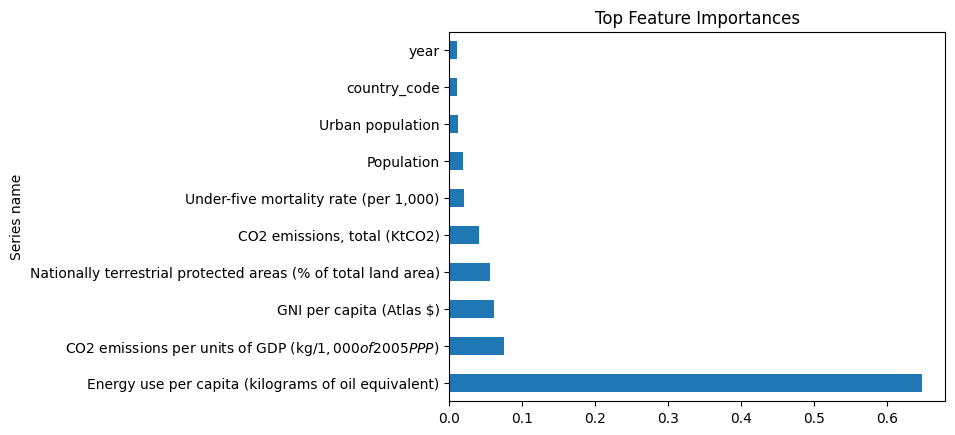

In [19]:
import matplotlib.pyplot as plt

feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.title("Top Feature Importances")
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression R² Score: 0.7400640402942142


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Train Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Train Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Train SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Use the prediction from RandomForestRegressor in cell LSSDkrriOyKr
y_pred_rf = y_pred

print("\nModel Comparison:")
print("Linear Regression:", r2_score(y_test, y_pred_lr))
print("Decision Tree     :", r2_score(y_test, y_pred_dt))
print("Random Forest     :", r2_score(y_test, y_pred_rf))
print("Gradient Boosting :", r2_score(y_test, y_pred_gb))
print("SVR               :", r2_score(y_test, y_pred_svr))


Model Comparison:
Linear Regression: 0.7400640402942142
Decision Tree     : 0.9532480770096007
Random Forest     : 0.9752049822883745
Gradient Boosting : 0.9460520133273673
SVR               : -0.044168013039741494
